#  E-commerce Sales Analysis (Amazon-Style Dataset)

Анализ набора данных о продажах электронной коммерции (50,000 транзакций), направленный на изучение поведения покупателей, эффективности дисконтной политики и влияния социальных факторов (рейтингов) на выручку.

##  Основные цели исследования
1. Провести очистку и проверку качества данных (Data Hygiene).
2. Оценить влияние скидок на объем продаж и общую прибыль.
3. Выявить зависимость между рейтингами/отзывами и финансовыми показателями.
4. Проанализировать временную и региональную стабильность продаж.

##  Используемый стек
- **Python** (Pandas, Numpy)
- **Visualization:** Matplotlib, Seaborn

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


###  Этап 1: Уборка и подготовка данных (Data Cleaning)

На этом этапе мы провели «гигиеническую» проверку датасета на наличие ошибок, пропусков и аномалий.

**Выполненные операции:**
- [x] **Проверка на пропуски:** Пустых значений (NaN) не обнаружено.
- [x] **Дубликаты:** Повторяющиеся записи отсутствуют.
- [x] **Типы данных:** Столбец `order_date` успешно преобразован в формат `datetime` для временного анализа.
- [x] **Анализ аномалий:** 
    - Цены и объемы продаж (`price`, `quantity_sold`) находятся в реалистичных положительных диапазонах.
    - Скидки не превышают 30%, что соответствует рыночной логике.
    - Рейтинги строго в диапазоне 1.0–5.0.

> **Вывод:** Данные чистые, консистентные и не содержат выбросов, которые могли бы исказить результаты анализа.


In [57]:
df = pd.read_csv("amazon_sales_dataset.csv")
print("---Общая информация о датасете---")
df.info()

---Общая информация о датасете---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          50000 non-null  int64  
 1   order_date        50000 non-null  object 
 2   product_id        50000 non-null  int64  
 3   product_category  50000 non-null  object 
 4   price             50000 non-null  float64
 5   discount_percent  50000 non-null  int64  
 6   quantity_sold     50000 non-null  int64  
 7   customer_region   50000 non-null  object 
 8   payment_method    50000 non-null  object 
 9   rating            50000 non-null  float64
 10  review_count      50000 non-null  int64  
 11  discounted_price  50000 non-null  float64
 12  total_revenue     50000 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 5.0+ MB


In [58]:
print("---Проверка на дубликаты---")
dp = df.duplicated().sum()
print(f"Кол-во дубликотов: {dp}")

---Проверка на дубликаты---
Кол-во дубликотов: 0


In [59]:
print("\n___Проверка аномалий___")
display(df.describe())


___Проверка аномалий___


,order_id,product_id,price,discount_percent,quantity_sold,rating,review_count,discounted_price,total_revenue
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,2986.848740,252.507260,13.340700,2.999400,2.996316,249.329280,218.886566,657.331475
std,14433.901067,1156.374535,143.025544,9.850694,1.415401,1.154295,144.251981,127.317681,526.223968
min,1.000000,1000.000000,5.010000,0.000000,1.000000,1.000000,0.000000,3.530000,3.840000
25%,12500.750000,1983.000000,127.840000,5.000000,2.000000,2.000000,125.000000,109.680000,240.320000
50%,25000.500000,2983.000000,252.970000,10.000000,3.000000,3.000000,250.000000,215.805000,505.410000
75%,37500.250000,3989.000000,376.335000,20.000000,4.000000,4.000000,374.000000,322.702500,968.970000
max,50000.000000,4999.000000,499.990000,30.000000,5.000000,5.000000,499.000000,499.910000,2499.550000


### 2. География и Категории
*   **Равномерность:** Продажи распределены идеально ровно по всем регионам (лидирует Азия с минимальным отрывом).
*   **Топ-категория:** Beauty (Красота), однако разброс между категориями не превышает 3%.

In [60]:
print("---Топ-5 категорий по выручке---")
cr = df.groupby('product_category')['total_revenue'].sum().sort_values(ascending=False)
print(cr)

---Топ-5 категорий по выручке---
product_category
Beauty            5550624.97
Books             5484863.03
Fashion           5480123.34
Home & Kitchen    5473132.55
Electronics       5470594.03
Sports            5407235.82
Name: total_revenue, dtype: float64


In [61]:
print("\n---Продажа по регионам---")
reg_sal = df["customer_region"].value_counts()
print(reg_sal)


---Продажа по регионам---
customer_region
Asia             12526
North America    12517
Middle East      12505
Europe           12452
Name: count, dtype: int64


In [62]:
print("\n---Популярный метод оплаты---")
payment_counts = df['payment_method'].value_counts(normalize=True) * 100
print(payment_counts.map('{:.1f}%'.format))


---Популярный метод оплаты---
payment_method
Wallet              20.2%
UPI                 20.2%
Debit Card          20.0%
Cash on Delivery    19.9%
Credit Card         19.8%
Name: proportion, dtype: object


In [63]:
print("\n---Средний чек по регионам---")
avg_check = df.groupby('customer_region')['total_revenue'].mean().sort_values(ascending=False)
print(avg_check)


---Средний чек по регионам---
customer_region
Middle East      663.882007
North America    661.278089
Asia             652.658457
Europe           651.486634
Name: total_revenue, dtype: float64


### 3. Эффективность скидок (Discount Impact)
*   **Парадокс выручки:** Обнаружена отрицательная корреляция (**-0.14**) между размером скидки и общей выручкой.
*   **Нулевая эластичность:** Скидка в 30% не увеличивает среднее количество товаров в корзине (`quantity_sold` стабильно ~3 шт.). 
*   **Вывод:** Текущая дисконтная политика убыточна. Покупатели не чувствительны к цене.



---Анализ влияния скидок на объём продаж---
   discount_percent  quantity_sold  total_revenue  orders_count
0                 0       2.986490     6154055.31          8216
1                 5       2.995644     6182826.90          8495
2                10       2.999759     5732411.47          8301
3                15       3.003369     5322103.91          8310
4                20       3.028763     5128525.23          8344
5                30       2.982241     4346650.92          8334


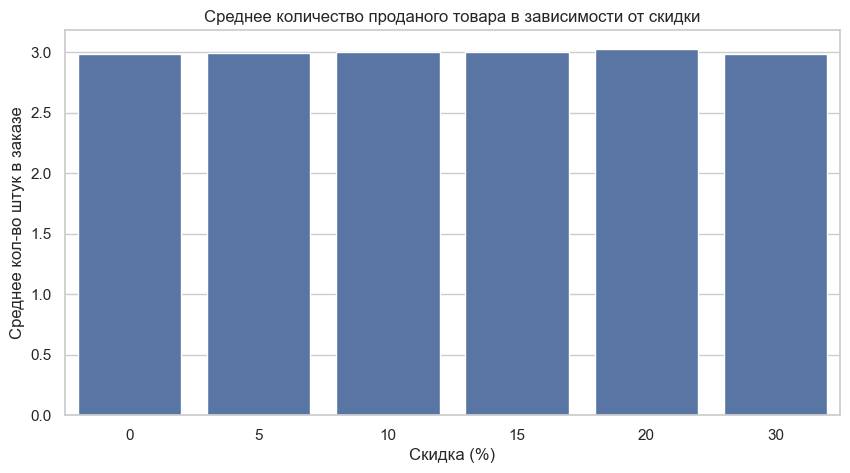


---Корреляция между скидкой и выручкой---
Коэффицент корреляции: -0.1444


In [64]:
print("\n---Анализ влияния скидок на объём продаж---")
discount_analysis = df.groupby('discount_percent').agg({
    'quantity_sold': 'mean',
    'total_revenue': 'sum',
    'order_id': 'count'
}).rename(columns={'order_id': 'orders_count'}).reset_index()

print(discount_analysis)
plt.figure(figsize=(10, 5))
sns.barplot(data=discount_analysis, x='discount_percent', y='quantity_sold')
plt.title('Среднее количество проданого товара в зависимости от скидки')
plt.xlabel('Скидка (%)')
plt.ylabel('Среднее кол-во штук в заказе')
plt.show()

print("\n---Корреляция между скидкой и выручкой---")
correlation = df['discount_percent'].corr(df['total_revenue'])
print(f"Коэффицент корреляции: {correlation:.4f}")

###  Этап 4: Влияние рейтинга и отзывов

**Гипотеза:** "Высокий рейтинг и популярность растят продажи".
**Результат:** Опровергнуто.

*   **Рейтинг 1.0 vs 5.0:** Разница в выручке < 2%. Покупатели игнорируют звезды.
*   **Отзывы:** Количество фидбека не влияет на чек. Группы "Мало" и "Много" приносят одинаковый доход.
*   **Статистика:** Корреляция с выручкой ничтожна (**0.0018**).

> **Инсайт:** Вкладывать бюджет в управление репутацией (ORM) здесь бессмысленно — это не конвертируется в деньги.


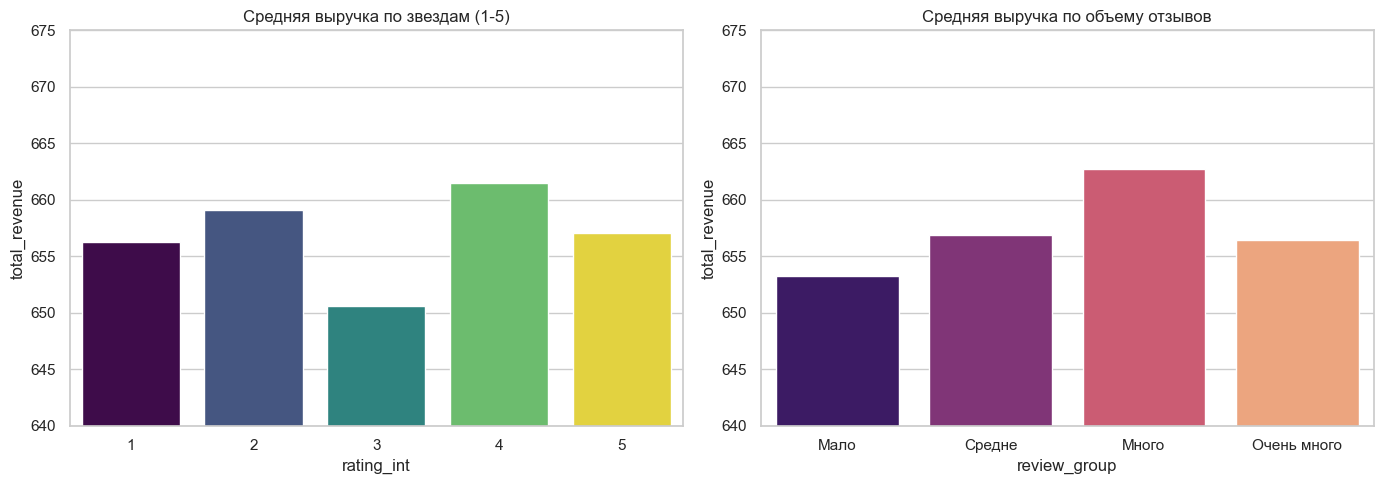


Коэффициенты влияния факторов на выручку (Correlation):


,total_revenue,quantity_sold,discount_percent,rating,review_count
total_revenue,1.0,0.594404,-0.144392,0.001804,0.002208


In [65]:
df['rating_int'] = df['rating'].round().astype(int)

if 'review_group' not in df.columns:
    df['review_group'] = pd.qcut(df['review_count'], q=4, labels=['Мало', 'Средне', 'Много', 'Очень много'])

rating_data = df.groupby('rating_int')['total_revenue'].mean().reset_index()
review_data = df.groupby('review_group', observed=True)['total_revenue'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(data=rating_data, x='rating_int', y='total_revenue', hue='rating_int', palette='viridis', legend=False, ax=axes[0])
axes[0].set(title='Средняя выручка по звездам (1-5)', ylim=(640, 675))

sns.barplot(data=review_data, x='review_group', y='total_revenue', hue='review_group', palette='magma', legend=False, ax=axes[1])
axes[1].set(title='Средняя выручка по объему отзывов', ylim=(640, 675))

plt.tight_layout()
plt.show()

print("\nКоэффициенты влияния факторов на выручку (Correlation):")
cols = ['total_revenue', 'quantity_sold', 'discount_percent', 'rating', 'review_count']
display(df[cols].corr()[['total_revenue']].T)


### 5. Временные ряды (Time Series)
*   **Отсутствие сезонности:** Данные не показывают типичных пиков в период праздников (ноябрь/декабрь). 
*   **Стабильность:** Бизнес работает с одинаковой интенсивностью 24/7, без выходных и просадок.



---1. Динамика выручки по месяцам ---
order_month
2022-01    1419751.89
2022-02    1266714.29
2022-03    1392585.42
2022-04    1371955.83
2022-05    1374779.57
2022-06    1352125.49
2022-07    1346089.18
2022-08    1449308.06
2022-09    1403967.06
2022-10    1334818.11
2022-11    1291100.05
2022-12    1386209.61
2023-01    1464174.99
2023-02    1238380.51
2023-03    1366418.41
2023-04    1307017.94
2023-05    1431398.77
2023-06    1394822.13
2023-07    1442176.66
2023-08    1396321.88
2023-09    1341007.86
2023-10    1425936.23
2023-11    1334328.47
2023-12    1335185.33
Freq: M, Name: total_revenue, dtype: float64

---2. Средняя выручка по дням недели ---
day_of_week
Monday       652.721054
Tuesday      654.444606
Wednesday    655.121082
Thursday     652.097091
Friday       666.959984
Saturday     662.351772
Sunday       657.278911
Name: total_revenue, dtype: float64


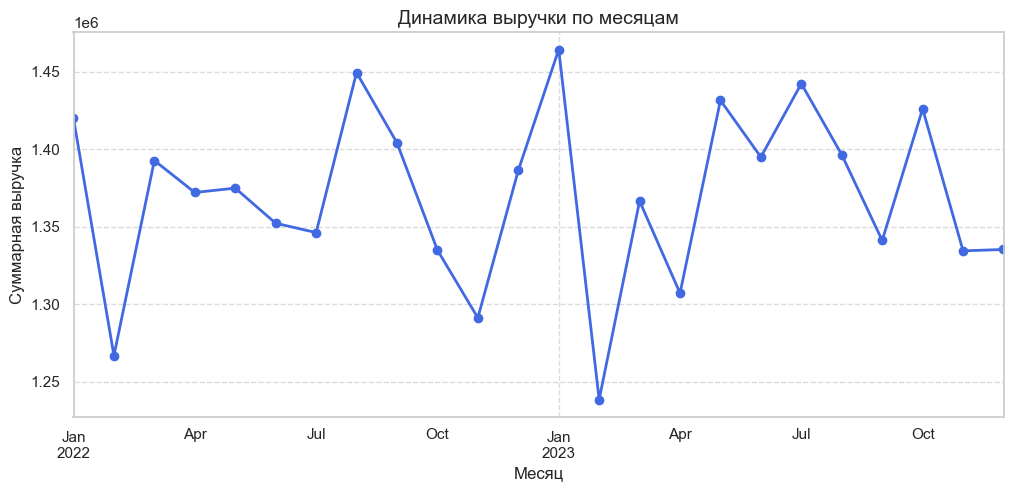

In [66]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_month'] = df['order_date'].dt.to_period('M')
df['day_of_week'] = df['order_date'].dt.day_name()

print("---1. Динамика выручки по месяцам ---")
monthly_revenue = df.groupby('order_month')['total_revenue'].sum()
print(monthly_revenue)

print("\n---2. Средняя выручка по дням недели ---")
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sales = df.groupby('day_of_week')['total_revenue'].mean().reindex(days_order)
print(weekday_sales)

plt.figure(figsize=(12, 5))
monthly_revenue.plot(kind='line', marker='o', color='royalblue', linewidth=2)
plt.title('Динамика выручки по месяцам', fontsize=14)
plt.xlabel('Месяц')
plt.ylabel('Суммарная выручка')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

##  Итоги исследования (Conclusion)

В ходе анализа 50,000 транзакций были опровергнуты классические рыночные гипотезы:
1. **Скидки не работают на объем:** Покупатели берут фиксированное количество товара (~3 ед.) вне зависимости от дисконта. Увеличение скидки ведет к прямой потере выручки.
2. **Качество не коррелирует с спросом:** Рейтинги и отзывы не являются драйверами продаж.
3. **Стабильность системы:** Отсутствие сезонности и региональных перекосов говорит о равномерном спросе в течение всего года.

**Рекомендация для бизнеса:** Переход от стратегии скидок к стратегии удержания маржи и оптимизации логистики.

---
*Проект выполнен в рамках учебного анализа данных (EDA).*